<center>
    <img src="https://cdn.knoji.com/images/logo/github-jobs.jpg?aspect=center&snap=false&width=500&height=250" width="600" alt="Number logo" />
</center>

# Objective: Determine the number of jobs currently open for various technologies using Github Jobs API.


Collect the number of job postings for the following languages using the API:

-   C
-   C#
-   C++
-   Java
-   JavaScript
-   Python
-   Scala
-   Oracle
-   SQL Server
-   MySQL Server
-   PostgreSQL
-   MongoDB

### Importing Librares
To Collect the Data, we will need some tools at our disposal to make the process as seamless as possible. We will not go through all the libraries but will take the time to explain a few.

1. **pandas** - Pandas is used for data manipulation and analysis.
2. **csv** - To Save the data in the Csv format.
3. **requests** - The requests allows you to send HTTP requests using Python.


In [2]:
import requests
import pandas as pd
import csv

Write a function to get the number of jobs for the given technology.<br>
_Note:_ The API gives a maximum of 50 jobs per page.<br>
If you get 50 jobs per page, it means there could be some more job listings available.<br>
So if you get 50 jobs per page you should make another API call for next page to check for more jobs.<br>
If you get less than 50 jobs per page, you can take it as the final count.<br>

### Creating Function for Collecting Data.

In [16]:
def sum(technology,i):
    url = 'https://jobs.github.com/positions.json?description={}&page={}'.format(technology,i)
    response = requests.get(url)
    if response.ok:             
        data1 = response.json() 
    number_of_jobs = len(data1)  
    return number_of_jobs


def get_number_of_jobs(technology):
    number_of_jobs = 0
    i = 0
    while sum(technology,i) == 50 :
        number_of_jobs = number_of_jobs + sum(technology,i) 
        i = i+1
    number_of_jobs = number_of_jobs + sum(technology,i)
    return technology,number_of_jobs

In [17]:
get_number_of_jobs('JavaScript')

('JavaScript', 115)

### Getting the Data 

In [18]:
in_put = ['C','C%23','C%2B%2B','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']
output = []
for i in in_put:
    output.append(list(get_number_of_jobs(i)))

In [19]:
output

[['C', 244],
 ['C%23', 25],
 ['C%2B%2B', 15],
 ['Java', 138],
 ['JavaScript', 115],
 ['Python', 101],
 ['Scala', 45],
 ['Oracle', 9],
 ['SQL Server', 16],
 ['MySQL Server', 9],
 ['PostgreSQL', 12],
 ['MongoDB', 9]]

Rename *C%23* and *C%2B%2B* , as C# and C++ Respectively

In [20]:
output[1][0] = 'C#'
output[2][0] = 'C++'

In [21]:
output

[['C', 244],
 ['C#', 25],
 ['C++', 15],
 ['Java', 138],
 ['JavaScript', 115],
 ['Python', 101],
 ['Scala', 45],
 ['Oracle', 9],
 ['SQL Server', 16],
 ['MySQL Server', 9],
 ['PostgreSQL', 12],
 ['MongoDB', 9]]

### Converting Data to CSV

In [22]:
with open('GithubnumberofJobs.csv','w',newline='',encoding='utf-8') as file:
    a = csv.writer(file)
    a.writerow(['Technology','Number_of_jobs'])
    a.writerows(output)

In [3]:
df = pd.read_csv('GithubnumberofJobs.csv')

In [4]:
df.to_excel('GithubnumberofJobs.xlsx')

In [5]:
df = df.sort_values(by='Number_of_jobs',ascending=False)

<AxesSubplot:xlabel='Technology', ylabel='Number_of_jobs'>

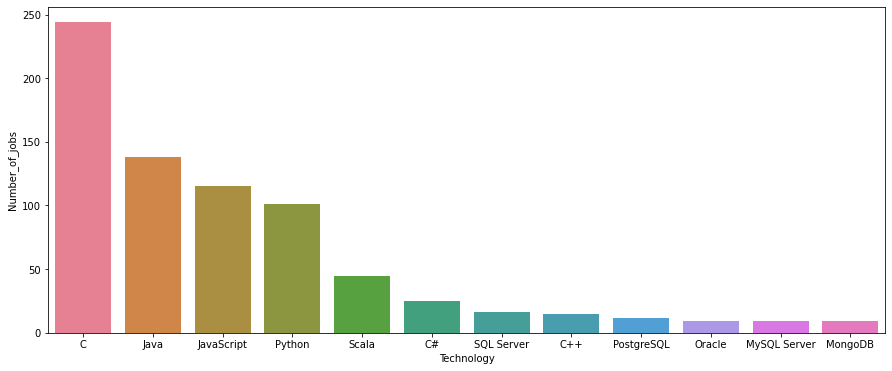

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Technology',y='Number_of_jobs', palette="husl",data=df,color="r")

# CREDIT
*Here,I have used  [**GitHub Jobs**](https://jobs.github.com/) to collect Jobs Data,this information is just for the Project Purpose.*

Image Source : [**knoji**](https://githubjobs.knoji.com/questions/githubjobs-paypal/)